In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

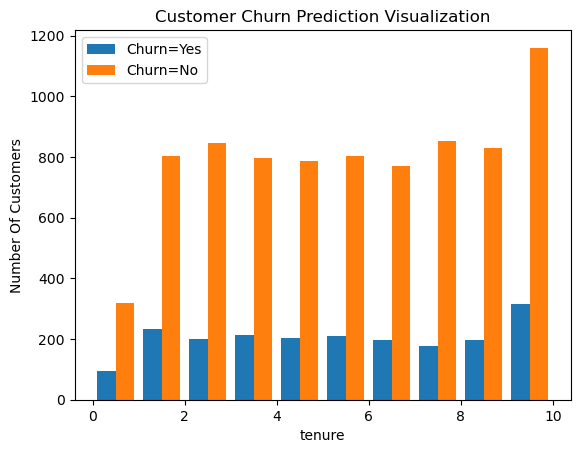

In [7]:
tenure_exited_no = df[df.Exited==0].Tenure
tenure_exited_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_exited_yes, tenure_exited_no],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

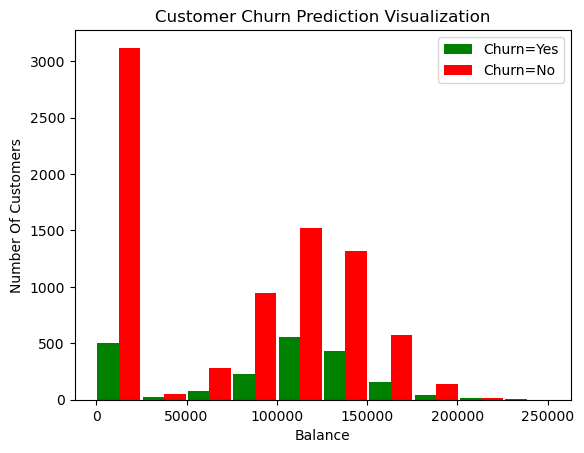

In [8]:
balance_churn_no = df[df.Exited==0].Balance      
balance_churn_yes = df[df.Exited==1].Balance      

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([balance_churn_yes, balance_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

In [9]:
categorical_cols=df.select_dtypes(include='object').columns
categorical_cols

Index(['Geography', 'Gender'], dtype='object')

In [10]:
# One HotEncoding-->using get_dummies
df=pd.get_dummies(data=df,columns=categorical_cols)

In [11]:
numeric_cols=df.select_dtypes(include='number').columns
numeric_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
## Scaling

scale_cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[scale_cols]=scaler.fit_transform(df[scale_cols])

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True,True,False


In [14]:
# Train test split
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
X_train.shape

(8000, 13)

In [16]:
X_test.shape

(2000, 13)

In [17]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.Input(shape=(13,)),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7318 - loss: 0.6117    
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.7962 - loss: 0.4851
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.7976 - loss: 0.4662
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8024 - loss: 0.4559
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8059 - loss: 0.4472
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8101 - loss: 0.4400
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8125 - loss: 0.4330
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8124 - loss: 0.4261
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8155 - loss: 0.4176
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8213 - loss: 0.4051
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8290 - loss: 0.3947
Epoch 12/50
250/250 ━━━━━━━━

In [18]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.3583  


[0.35831648111343384, 0.8525000214576721]

In [19]:
yp = model.predict(X_test)
yp[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.03664755],
       [0.05752493],
       [0.05633006],
       [0.06691389],
       [0.0468314 ],
       [0.10869273],
       [0.01566391],
       [0.3604547 ],
       [0.01757924],
       [0.9379098 ]], dtype=float32)

In [20]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [21]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [22]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [23]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [24]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.76      0.40      0.52       405

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.72      2000
weighted avg       0.84      0.85      0.83      2000



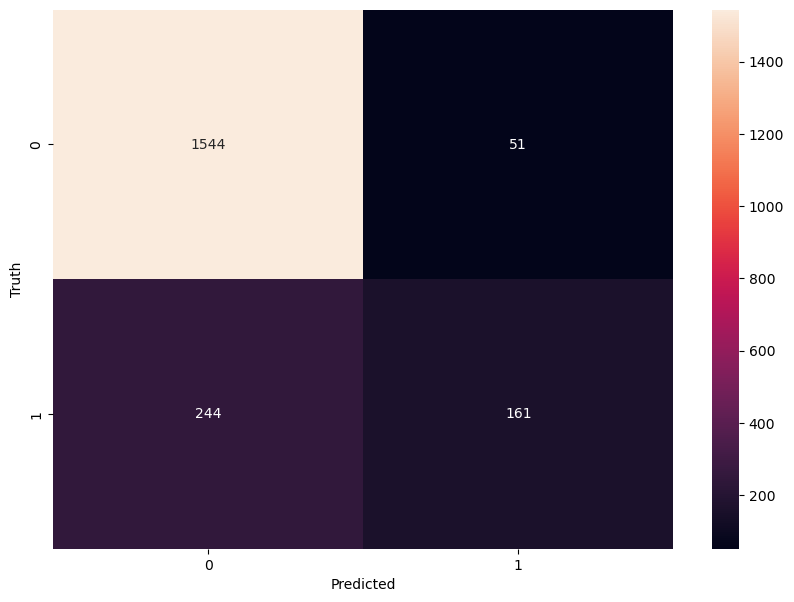

In [25]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()